In [157]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

In [158]:
def dxt(a,df,t):
    return (studt.cdf(a, df, loc=0, scale=1)-t)
def invert_studt(t,df):
    a = 10.0 * int(np.sqrt(df/(df-2)))
    b = -10.0 * int(np.sqrt(df/(df-2)))
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxt(c,df,t)) > tol):
        c = (a+b)/2
        if(dxt(c,df,t) > 0):
            a = c
        else:
            b = c
    return c

#### Exercise 6.5.1.

On page $80$ of their test, Hollander and Wolfe $(1999)$ present measurements of the ratio of the earth’s mass to that of its moon that were made by $7$ different spacecraft ($5$ of the Mariner type and $2$ of the Pioneer type). These measurements are presented below (also in the file earthmoon.rda). Based on earlier Ranger voyages, scientists had set this ratio at $81.3035$. Assuming a normal distribution, test the hypotheses $H_0 : \mu = 81.3035$ versus $H_1 : \mu \neq 81.3035$, where $\mu$ is the true mean ratio of these later voyages. Using the $p$-value, conclude in terms of the problem at the nominal $\alpha$-level of $0.05$.

||Earth|to|Moon|Mass|Ratios||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|81.3001|81.3015|81.3006|81.3011|81.2997|81.3005|81.3021|



In [159]:
x=[81.3001,81.3015,81.3006,81.3011,81.2997,81.3005,81.3021]
mu0 = 81.3035

xb=np.mean(x)
sb = np.std(x,ddof=1)
ta = invert_studt(0.975,len(x)-1)

test_statistic = np.sqrt(len(x))*(xb-mu0)/sb

In [160]:
test_statistic,ta,(np.abs(test_statistic)>ta)

(-8.641646184614268, 2.4468994140625, True)

In [161]:
if(np.abs(test_statistic)>ta):
    print('Hypothesis is rejected')
else:
    print('Hypothesis cannot be rejected')

Hypothesis is rejected


#### Exercise 6.5.2. 

Obtain the boxplot of the data in Exercise $6.5.1.$ Mark the value $81.3035$ on the plot. Compute the $95\%$ confidence interval for $\mu$, $(4.2.3)$, and mark its endpoints on the plot. Comment.

In [162]:
print('Confidence interval is:')
print((xb-ta*sb/np.sqrt(len(x))),(xb+ta*sb/np.sqrt(len(x))))

ci = [(xb-ta*sb/np.sqrt(len(x))),(xb+ta*sb/np.sqrt(len(x)))]
hyp = [mu0]

Confidence interval is:
81.30003548959576 81.30156451040426


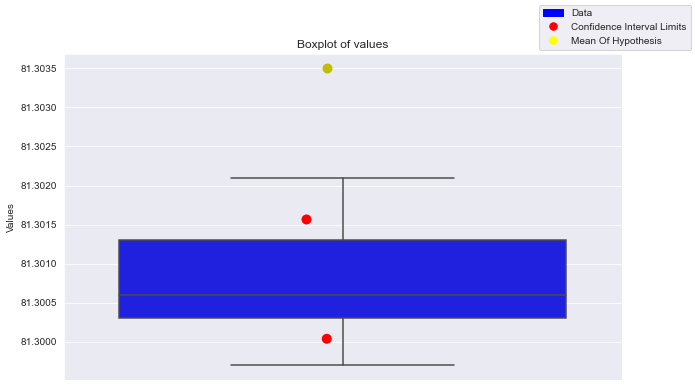

In [163]:
fig1 = plt.figure(figsize = (10,6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

ax=sns.boxplot(y=x,color='b')
sns.stripplot(y=ci,color='r',size=10)
sns.stripplot(y=hyp,color='y',size=10)

blue_line = mlines.Line2D([], [], color='blue', marker='', label='Data')
blue_patch = mpatches.Patch(color='blue', label='Data')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',markersize=15, label='Confidence Interval Limits')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='.', linestyle='None',markersize=15, label='Mean Of Hypothesis')

fig1.legend(handles = [blue_patch,red_dot,yellow_dot])
ax.get_yaxis().get_major_formatter().set_useOffset(False)

plt.title('Boxplot of values')
plt.ylabel('Values')
plt.show()

In [164]:
# plt.figure(figsize = (10,6))

# sns.set_style('darkgrid')
# sns.set_palette('Set2')

# sns.boxplot(x = hit['weight'], y = pitch['weight'])

# plt.title('Boxplot of weights')
# plt.ylabel('Pitcher Weights')
# plt.xlabel('Hitter Weights')

# plt.show()

In [165]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

In [166]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

#### Exercise 6.5.3. 

Consider the survey of citizens discussed in Exercise $6.4.1$. Suppose that the hypotheses of interest are $H_0 : p_1 = p_2$ versus $H_1 : p_1 \neq p_2$. Note that computation can be carried out using the R function p2pair.R, which can be downloaded at the site mentioned in the Preface.

(a) Test these hypotheses at level $\alpha = 0.05$ using the test $(6.5.20).$ Conclude in terms of the problem.

(b) Obtain the $95\%$ confidence interval, $(6.5.21)$, for $p_1 - p_2$. What does the confidence interval mean in terms of the problem?

In [167]:
# (a)

n = 60+45+70+25
p1 = 60/n
p2 = 45/n
p3 = 70/n
p4 = 25/n

pmle = [p1,p2,p3,p4] 

chi_stat = invert_chi2(0.95,1)

In [168]:
chi_stat

3.841400146484375

In [169]:
wald_stat = n*(p1-p2)**2/(p1+p2-(p1-p2)**2)

if(wald_stat > chi_stat):
    print('Hypothesis cannot be rejected')
else:
    print('Hypothesis cannot be rejected')

Hypothesis cannot be rejected


In [170]:
# (b)

mid = (p1-p2)
za = invert_norm(0.975)
dev = za*((p1+p2-(p1-p2)**2)/n)**0.5
print((mid-dev,mid+dev))

(-0.0248724925876823, 0.17487249258768228)


Answer from the text:

$6.5.3$ (b) $(−0.0249, 0.1749).$

The interval traps $0$ so hypothesis cannot be rejected

Starting from $6.5.4$ till $6.5.7$, Tomoki Okuno has solutions.

#### Exercise 6.5.8. 

For a numerical example of the F-test derived in Exercise $6.5.7$, here are two generated data sets. The first was generated by the R call rexp$(10,1/20)$, i.e., $10$ observations from a $\Gamma(1,20)$ distribution. The second was generated by rexp$(12,1/40)$. The data are rounded and can also be found in the file genexpd.rda.

(a) Obtain comparison boxplots of the data sets. Comment.

(b) Carry out the F-test of Exercise $6.5.7$. Conclude in terms of the problem at level $0.05$.

||||||||||||||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|x: |11.1 |11.7 |12.7 |9.6 |14.7 |1.6 |1.7 |56.1 |3.3 |2.6|||
|y: |55.6 |40.5 |32.7 |25.6 |70.6 |1.4 |51.5 |12.6 |16.9 |63.3 |5.6 |66.7|

Answer at the end of the book

$6.5.8$ (b) $F = \overline{x}/\overline{y} = 0.3389$, Reject.

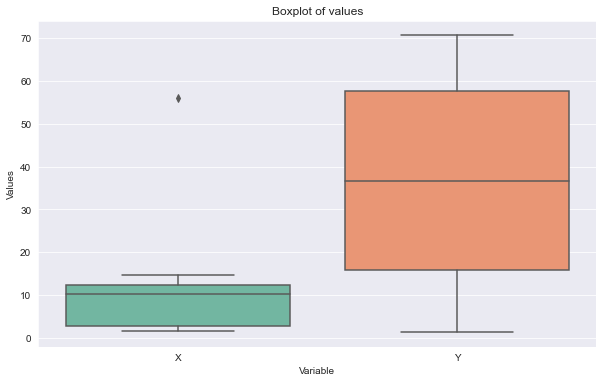

In [171]:
# (a)

x0=[11.1,11.7,12.7,9.6,14.7,1.6,1.7,56.1,3.3,2.6]
y0=[55.6,40.5,32.7,25.6,70.6,1.4,51.5,12.6,16.9,63.3,5.6,66.7]

data0 = pd.DataFrame({'X': pd.Series(x0), 'Y': pd.Series(y0)})

plt.figure(figsize = (10,6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.boxplot(data=data0)

plt.title('Boxplot of values')
plt.ylabel('Values')
plt.xlabel('Variable')

plt.show()

X has one outlier, while Y has higher variance but no outlier.

In [172]:
# (b)

f = np.mean(x0)/np.mean(y0)

In [173]:
def dxf(a,dfn,dfd,t):
    return (fdist.cdf(a, dfn,dfd)-t)
def invert_fdist(t,d1,d2):
    var = 2*d2**2/(d2-2)**2/(d2-4)*(d1+d2-2)/d1
    sig = np.sqrt(var)
    mu = d2/(d2-2)
    a = int((mu+10.0) * (sig))
    b = int((mu-10.0) * (sig))
#     a = 1000
#     b = -1000
    c = (a+b)/2
#     print(a,b,c,mu,sig)
    tol = 0.00001
    cnt = 0
    while(abs(dxf(c,d1,d2,t)) > tol):
        cnt = cnt+1
        c = (a+b)/2
        if(dxf(c,d1,d2,t) > 0):
            a = c
        else:
            b = c
        if(cnt > 100):
#             print(a,b,c)
            return -1
    return c

As Tomoki points out in the solution, the F-statistic $\overline{x}/\overline{y}$ is distributed as $\textrm{F}_{(2n_1,2n_2)}$

In [174]:
print(f,invert_fdist(0.025,2*len(x0),2*len(y0)),invert_fdist(0.975,2*len(x0),2*len(y0)))

0.3388713318284425 0.41533660888671875 2.327301025390625


Test statistic is lower than the lower limit of $0.415$ and hence we reject the hypothesis

Solutions manual has solution to $6.5.9$ under $6.5.6$

#### Exercise 6.5.10.

Let $(X_1,Y_1),(X_2,Y_2),...,(X_n,Y_n)$ be a random sample from a bivariate normal distribution with $\mu_1,\mu_2,\sigma^2_1 = \sigma^2_2 = \sigma^2,\rho = 1/2$, where $\mu_1,\mu_2,$ and $\sigma^2 > 0$ are two unknown real numbers. Find the likelihood ratio $\Lambda$ for testing $H_0 : \mu_1 = \mu_2 = 0$, $\sigma^2$ unknown against all alternatives. The likelihood ratio $\Lambda$ is a function of what statistic that has a well-known distribution?

The following SE links have solutions/useful material

https://stats.stackexchange.com/q/543336/183497

https://stats.stackexchange.com/q/142395/183497

https://stats.stackexchange.com/q/599057/183497 (assumes no correlation)

Finding likelihood-ratio is fairly straightforward. The statistic of which it is a function is the tricky one which the answers above try to explore.

#### Exercise 6.5.11

Let $n$ independent trials of an experiment be such that $x_1,x_2,\ldots,x_k$ are
the respective numbers of times that the experiment ends in the mutually exclusive
and exhaustive events $C_1,C_2,\ldots,C_k.$ If $p_i = P(C_i)$ is constant throughout the $n$
trials, then the probability of that particular sequence of trials is $L=p_1^{x_1}p_2^{x_2}\cdots p_k^{x_k}.$

(a) Recalling that $p_1 + p_2 + \cdots + p_k = 1$, show that the likelihood ratio for testing $H_0 : p_i = p_{i0} > 0, i = 1,2,\ldots, k,$ against all alternatives is given by $$\Lambda = \prod_{i=1}^k \left ( \cfrac{(p_{i0})^{x_i}}{(x_i/n)^{x_i}} \right )$$

(b) Show that $$-2\log{\Lambda} = \sum_{i=1}^k \cfrac{x_i(x_i-np_{i0})^2}{(np'_{i})^2}$$ where $p_i'$ is between $p_{i0}$ and $x_i/n$

*Hint*: Expand $\log{p_{i0}}$ in a Taylor’s series with the remainder in the term
involving $(p_{i0} − x_i/n)^2.$

(c) For large $n$, argue that $x_i/(np_i')^2$ is approximated by $1/(np_{i0})$ and hence $$-2\log{\Lambda} \approx \sum_{i=1}^{k} \cfrac{(x_i-np_{i0})^2}{np_{i0}}.$$

Theorem $6.5.1$ says that the right-hand member of this last equation defines a statistic that has an approximate chi-square distribution with $k − 1$ degrees of freedom. Note that dimension of $\Omega$ $-$ dimension of $\omega = (k − 1) − 0 = k − 1.$

Part (a) is trivial. I could not complete part (b) initially. I could derive an expression for $p'_i$ but then showing that it lies between $x_i/n$ and $p_{i_0}$ was not obvious to me. Then I kept on trying recording my thoughts on SE
https://stats.stackexchange.com/q/651822/183497
Finally, I think I got the answer after trying for a long time, even though it was a trivial to solve it, and was a matter of knowing a form of Taylor Series expansion.

Again part (c) is also trivial (basically the events $C_1$ and its complement form a binomial distribution with probability $p_i$ and under $H_0$, $x_i/n \xrightarrow{P} p_i $ (from CLT) $ = p_{i0}$ as $n \to \infty$, and $p'_i$ will approach the GM of $x_i/n$ and $p_{i0}$ which lies between them (see https://math.stackexchange.com/a/4680606/145325). Therefore as the interval between $x_i/n$ and $p_i$ shrinks to $0$ under $H_0$, the rest follows).

#### Exercise 6.5.12

Finish the derivation of the LRT found in Example $6.5.3.$ Simplify as much as possible.

This is just deriving the LRT using equation $6.5.23$ for the null case, and the alternative case, and taking ratios. The solutions manual has the answer under $6.5.9$

#### Exercise 6.5.13. 

Show that expression $(6.5.25)$ of Example $6.5.3$ is true.

Not much to show here. The equation before $6.5.25$ shows that some scaled value of $\hat{p}_1-p_1$ is $\textrm{N}(0,1)$. So with appropriate scaling, and subtracting one from the other, and noting that mean is still $0$, we can arrive at equation $6.5.25$.

Solutions manual has the answer to $6.5.14$

#### Exercises 6.5.15 and 6.5.16

Converted the R code from solutions manual to Python using the following online R to Python code converter tool

https://www.codeconvert.ai/r-to-python-converter

In [175]:
def p6513(x, y, n1, n2):
    p1 = x / n1
    p2 = y / n2
    pc = (n1 * p1 + n2 * p2) / (n1 + n2)
    zw = (p1 - p2) / np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))
    pzw = 2 * min(norm.cdf(zw), 1 - norm.cdf(zw))
    lrt = -2 * (n1 * p1 * np.log(pc / p1) + n2 * p2 * np.log(pc / p2) +
                (n1 - n1 * p1) * np.log((1 - pc) / (1 - p1)) +
                (n2 - n2 * p2) * np.log((1 - pc) / (1 - p2)))
    plrt = 1 - chi2.cdf(lrt, 1)
    zpc = (p1 - p2) / np.sqrt(pc * (1 - pc) * ((1 / n1) + (1 / n2)))
    pzpc = 2 * min(norm.cdf(zpc), 1 - norm.cdf(zpc))
    
    return {'zw': zw, 'pzw': pzw, 'lrt': lrt, 'plrt': plrt, 'zpc': zpc, 'pzpc': pzpc}

In [176]:
p6513(37,53,1000,1000)

{'zw': -1.7271126578424703,
 'pzw': 0.08414743276119413,
 'lrt': 2.9936531947726586,
 'plrt': 0.08359139201023247,
 'zpc': -1.7258261378415294,
 'pzpc': 0.08437869601106657}

In [177]:
p=random.uniform(0,1)
q=random.uniform(0,1)

pp = (p-q)**2/2/((p-q)/q - (np.log(p) - np.log(q)))
pp,p**2,q**2

(0.295993976328878, 0.01435227001061887, 0.9349132948757781)

In [178]:
min(p**2,q**2) < pp < max(p**2,q**2)

True

In [179]:
cnt = 0

while(cnt < 3000):
    p=random.uniform(0,1)
    q=random.uniform(0,1)
    pp = (p-q)**2/2/((p-q)/q - (np.log(p) - np.log(q)))
    if((min(p**2,q**2) < pp < max(p**2,q**2)) == False):
        print(p,q)
        break
    else:
        cnt = cnt+1